In [473]:
# Cell 1: Import necessary libraries/modules.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt

print("Libraries imported successfully.")


Libraries imported successfully.


In [474]:
# Cell 2: Load the training and test datasets
train_data_all = pd.read_csv('train.csv')
test_data_whole = pd.read_csv('test.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [475]:
# Cell 3 :  Describe the datasets

print(train_data_all.describe())
print(test_data_whole.describe())
print("")
print( "Need of a function to convert total assets,liabilties to numerical values so as to analyse ")

                ID  Criminal Case
count  2059.000000    2059.000000
mean   1029.000000       1.777562
std     594.526422       4.762183
min       0.000000       0.000000
25%     514.500000       0.000000
50%    1029.000000       0.000000
75%    1543.500000       2.000000
max    2058.000000      87.000000
                ID  Criminal Case
count  1374.000000    1374.000000
mean    686.500000       1.855895
std     396.783946       6.701603
min       0.000000       0.000000
25%     343.250000       0.000000
50%     686.500000       0.000000
75%    1029.750000       2.000000
max    1373.000000     173.000000

Need of a function to convert total assets,liabilties to numerical values so as to analyse 


In [476]:
#  Cell 4 : redifining train and test datas with the relevant features before defining a converter function
chosen_features = ['Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state', 'Education']
train_data = train_data_all[chosen_features]
test_data = test_data_whole[['Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state']]

In [477]:
# Cell 4: Define a function to convert monetary values to numerical format.
def convertToNumber(money_str):
    """
    Function to convert monetary values in string format to numerical format.
    
    Parameters:
    - money_str (str): String representing a monetary value.
    
    Returns:
    - float: Numerical value representing the monetary value.
    """
    if 'Crore' in money_str:
        return float(money_str.split()[0])
    elif 'Lac' in money_str:
        return float(money_str.split()[0]) / 100
    elif 'Thou' in money_str:
        return float(money_str.split()[0]) / 10000
    elif 'Hund' in money_str:
        return float(money_str.split()[0]) / 100000
    else:
        return 0

print("Conversion function defined successfully.")

print ("Apply the function for assets and liabilities")


# Convert monetary values to numerical format for 'Total Assets' and 'Liabilities' columns.
for column in ['Total Assets', 'Liabilities']:
    train_data[column] = train_data[column].apply(convertToNumber)
    test_data[column] = test_data[column].apply(convertToNumber)

print(train_data.describe())

print("")

print(test_data.describe())

print("")

print("Monetary values converted to numerical format successfully.")

print("")


 



Conversion function defined successfully.
Apply the function for assets and liabilities
       Criminal Case  Total Assets  Liabilities
count    2059.000000   2059.000000  2059.000000
mean        1.777562     11.559913     2.159068
std         4.762183     49.224650    20.486123
min         0.000000      0.000000     0.000000
25%         0.000000      0.950000     0.004850
50%         0.000000      2.000000     0.180000
75%         2.000000      8.000000     0.890000
max        87.000000   1267.000000   881.000000

       Criminal Case  Total Assets  Liabilities
count    1374.000000   1374.000000  1374.000000
mean        1.855895     12.503819     2.526648
std         6.701603     54.535429    14.524121
min         0.000000      0.000000     0.000000
25%         0.000000      0.915000     0.010000
50%         0.000000      3.000000     0.210000
75%         2.000000      8.750000     0.937500
max       173.000000   1413.000000   283.000000

Monetary values converted to numerical format 

C:\Users\Rohan123\AppData\Local\Temp\ipykernel_32204\828269265.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[column] = train_data[column].apply(convertToNumber)
C:\Users\Rohan123\AppData\Local\Temp\ipykernel_32204\828269265.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[column] = test_data[column].apply(convertToNumber)


In [478]:
# Cell 3:  Encode the 'Education' column 

print("Encode the 'Education' column to analyse it mathematically")
print("")
label_encoder = LabelEncoder()
train_data['Education'] = label_encoder.fit_transform(train_data['Education'])

print("Education column encoded successfully.")

print("")

print(train_data.describe())




Encode the 'Education' column to analyse it mathematically

Education column encoded successfully.

       Criminal Case  Total Assets  Liabilities    Education
count    2059.000000   2059.000000  2059.000000  2059.000000
mean        1.777562     11.559913     2.159068     4.714910
std         4.762183     49.224650    20.486123     3.046103
min         0.000000      0.000000     0.000000     0.000000
25%         0.000000      0.950000     0.004850     1.000000
50%         0.000000      2.000000     0.180000     5.000000
75%         2.000000      8.000000     0.890000     6.000000
max        87.000000   1267.000000   881.000000     9.000000


C:\Users\Rohan123\AppData\Local\Temp\ipykernel_32204\2446041968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Education'] = label_encoder.fit_transform(train_data['Education'])


As 75% of the people have at most 2 criminal case anything equal or more is considered to have high criminal record



C:\Users\Rohan123\AppData\Local\Temp\ipykernel_32204\2684468690.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['High Crime'] = train_data['Criminal Case'].apply(is_high_crime)


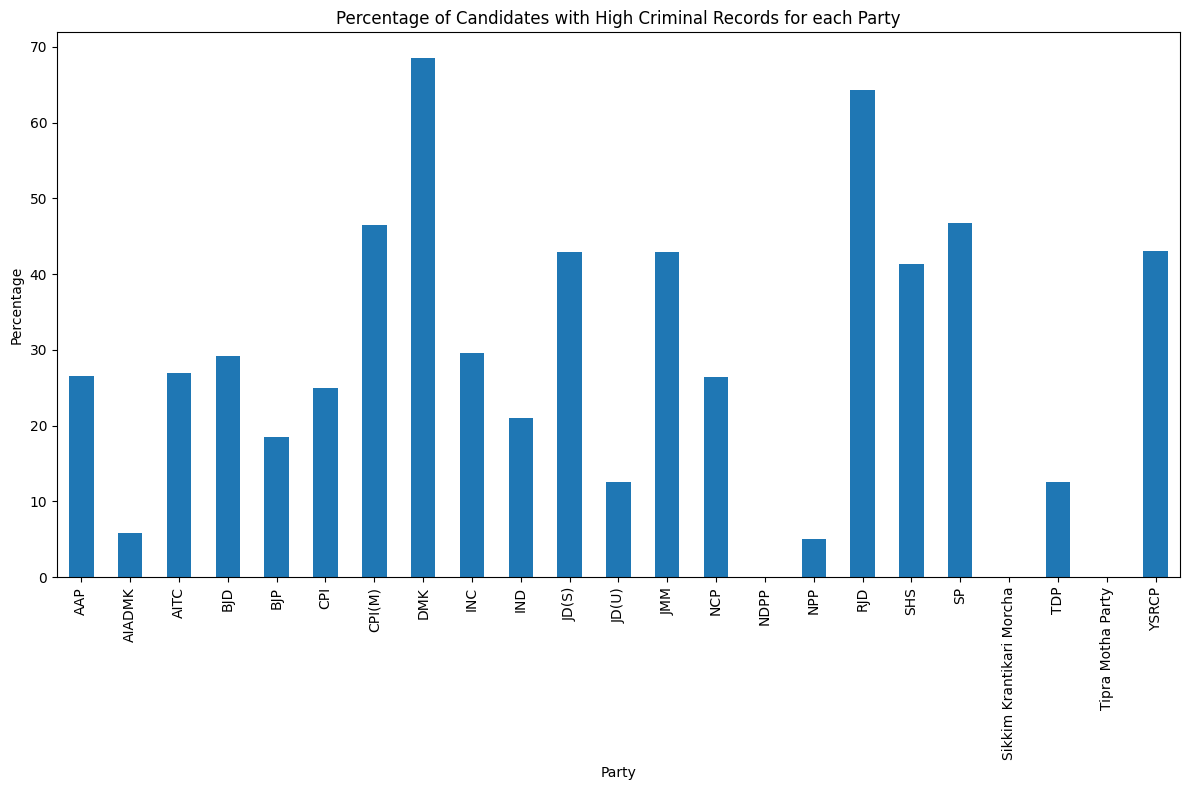

In [479]:


# Define a function to categorize criminal cases
def is_high_crime(record):
    return 1 if record >= 2 else 0

print("As 75% of the people have at most 2 criminal case anything equal or more is considered to have high criminal record")
print("")

# Apply the function to create a new column 'High Crime'
train_data['High Crime'] = train_data['Criminal Case'].apply(is_high_crime)

# Group the data by party and calculate the percentage of high crime candidates for each party
party_groups = train_data.groupby('Party')['High Crime']
party_high_crime_counts = party_groups.sum()
party_total_counts = party_groups.size()
party_percentage = (party_high_crime_counts / party_total_counts) * 100

# Plot the data
plt.figure(figsize=(12, 8))
party_percentage.plot(kind='bar')
plt.title('Percentage of Candidates with High Criminal Records for each Party')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

train_data = train_data.drop(columns =['High Crime'])

<Figure size 1200x800 with 0 Axes>

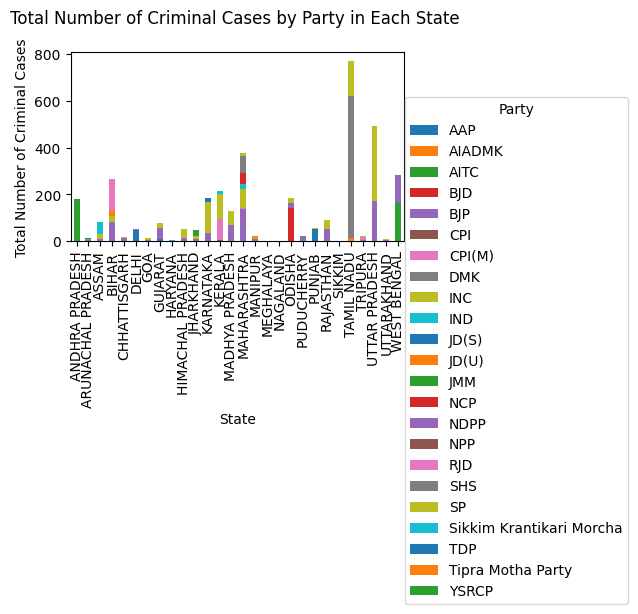

In [480]:


# Group the data by state and party, then calculate the total number of criminal cases for each combination
state_party_groups = train_data.groupby(['state', 'Party'])['Criminal Case'].sum()

# Plot the data
plt.figure(figsize=(12,8 ))
state_party_groups.unstack().plot(kind='bar', stacked=True)
plt.title('Total Number of Criminal Cases by Party in Each State \n')
plt.xlabel('State')
plt.ylabel('Total Number of Criminal Cases')
plt.xticks(rotation=90)
plt.legend(title='Party', bbox_to_anchor=(0.98, 0.8), loc='upper left')
plt.tight_layout()
plt.show()


The involvement  of all political parties in Maharashtra among criminal activities makes its politics interesting nationally compared to other states 



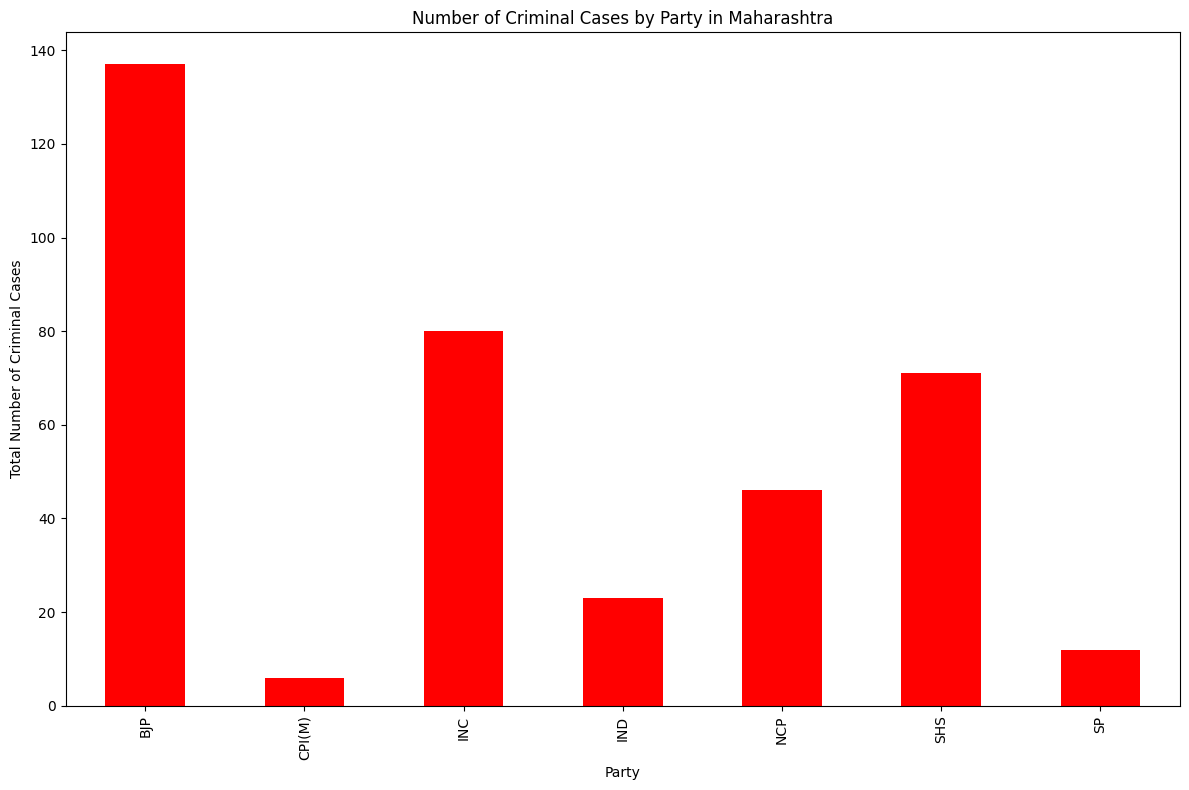

In [481]:

print("The involvement  of all political parties in Maharashtra among criminal activities makes its politics interesting nationally compared to other states ")

print ("")
# Filter data for maharashtra
maharashtra_data = train_data[train_data['state'] == 'MAHARASHTRA']

# Group the data by party and calculate the total number of criminal cases for each party in maharashtra
party_groups = maharashtra_data.groupby('Party')['Criminal Case'].sum()

# Plot the data
plt.figure(figsize=(12, 8))
party_groups.plot(kind='bar',color = 'red')
plt.title('Number of Criminal Cases by Party in Maharashtra')
plt.xlabel('Party')
plt.ylabel('Total Number of Criminal Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


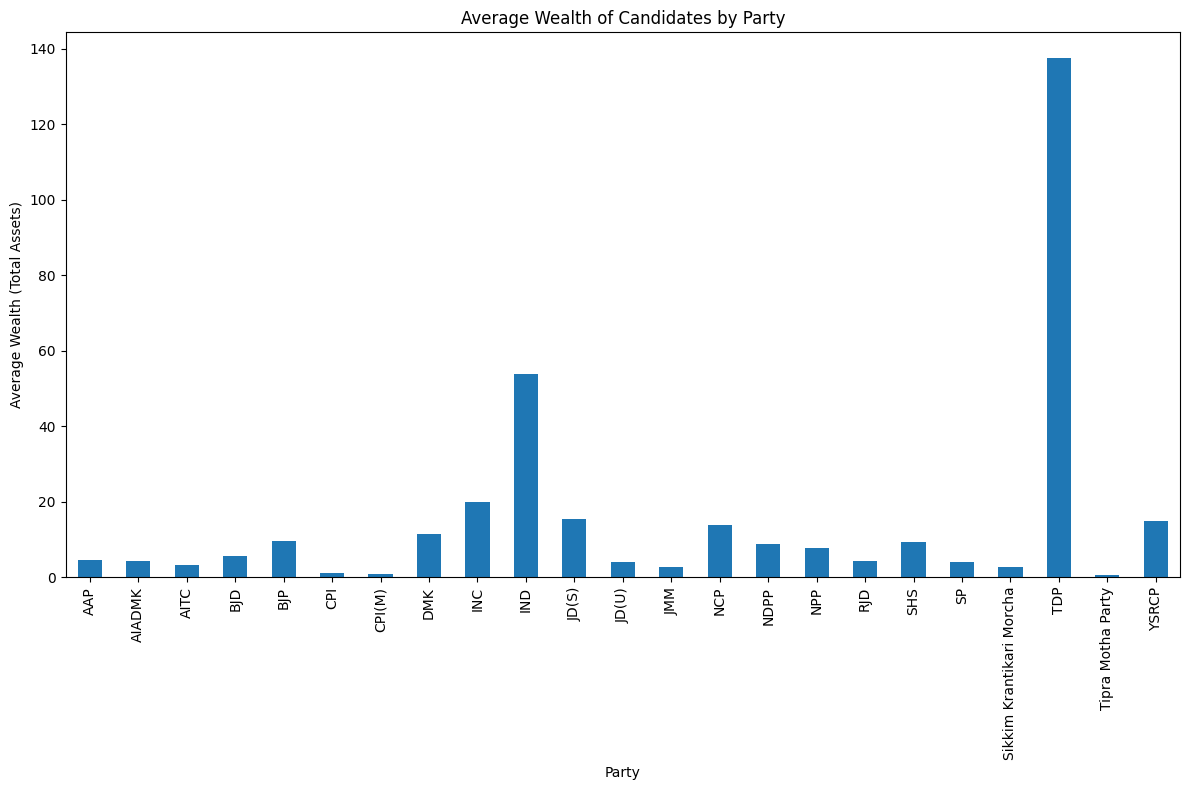

In [482]:

# Group the data by party and calculate the average wealth of candidates for each party
party_avg_wealth = train_data.groupby('Party')['Total Assets'].mean()

# Plot the data
plt.figure(figsize=(12, 8))
party_avg_wealth.plot(kind='bar')
plt.title('Average Wealth of Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Average Wealth (Total Assets)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


As Only 25% of the people have assets valuing  more than 8cr , Anyone above that is considered wealthy


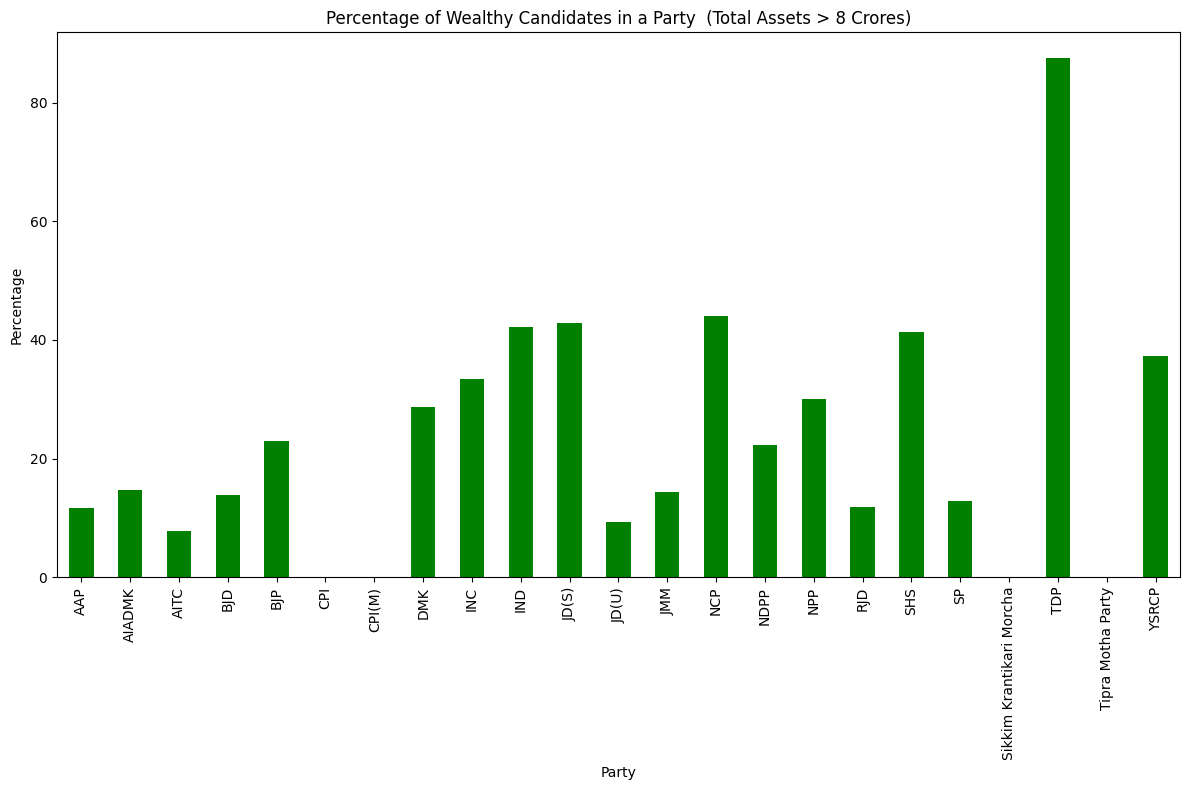

In [483]:

# Define a function to categorize wealthy candidates
def is_wealthy(asset):
    return 1 if asset > 8.0 else 0


print("As Only 25% of the people have assets valuing  more than 8cr , Anyone above that is considered wealthy")

# Apply the function to create a new column 'Wealthy'
train_data['Wealthy'] = train_data['Total Assets'].apply(is_wealthy)

# Group the data by party and calculate the percentage of wealthy candidates for each party
party_groups = train_data.groupby('Party')['Wealthy']
party_wealthy_counts = party_groups.sum()
party_total_counts = party_groups.size()
party_percentage = (party_wealthy_counts / party_total_counts) * 100

# Plot the data
plt.figure(figsize=(12, 8))
party_percentage.plot(kind='bar' ,color = 'green')
plt.title('Percentage of Wealthy Candidates in a Party  (Total Assets > 8 Crores)')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

train_data = train_data.drop(columns =['Wealthy'])


In [484]:
# Cell 6: Binarize 'Total Assets', 'Liabilities', and 'Criminal Case'.
print("Binarize 'Total Assets', 'Liabilities', and 'Criminal Case' for a better understanding of data")

binarizer = Binarizer()
for column in ['Total Assets', 'Liabilities', 'Criminal Case']:
    train_data[column] = binarizer.fit_transform(train_data[column].values.reshape(-1, 1))
    test_data[column] = binarizer.transform(test_data[column].values.reshape(-1, 1))
print("")   

print(train_data.describe())


print("")

print("Columns binarized successfully")

print("")

Binarize 'Total Assets', 'Liabilities', and 'Criminal Case' for a better understanding of data

       Criminal Case  Total Assets  Liabilities    Education
count    2059.000000   2059.000000  2059.000000  2059.000000
mean        0.448762      0.908208     0.759106     4.714910
std         0.497489      0.288802     0.427730     3.046103
min         0.000000      0.000000     0.000000     0.000000
25%         0.000000      1.000000     1.000000     1.000000
50%         0.000000      1.000000     1.000000     5.000000
75%         1.000000      1.000000     1.000000     6.000000
max         1.000000      1.000000     1.000000     9.000000

Columns binarized successfully



C:\Users\Rohan123\AppData\Local\Temp\ipykernel_32204\2980734375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[column] = binarizer.transform(test_data[column].values.reshape(-1, 1))
C:\Users\Rohan123\AppData\Local\Temp\ipykernel_32204\2980734375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[column] = binarizer.transform(test_data[column].values.reshape(-1, 1))
C:\Users\Rohan123\AppData\Local\Temp\ipykernel_32204\2980734375.py:7: SettingWithCopyWarning: 
A value is trying to be

In [485]:
# Cell 7 & 8: Perform one-hot encoding for categorical features in training and test data.
print("Perform one-hot encoding for categorical features in training and test data.")
print("")
train_data = pd.get_dummies(train_data, columns=['state', 'Party'])
test_data = pd.get_dummies(test_data, columns=['state', 'Party'])
print(train_data.describe())
print("")
print(test_data.describe())
print("")

print("One-hot encoding performed on training and test data successfully.")
print("")


Perform one-hot encoding for categorical features in training and test data.

       Criminal Case  Total Assets  Liabilities    Education
count    2059.000000   2059.000000  2059.000000  2059.000000
mean        0.448762      0.908208     0.759106     4.714910
std         0.497489      0.288802     0.427730     3.046103
min         0.000000      0.000000     0.000000     0.000000
25%         0.000000      1.000000     1.000000     1.000000
50%         0.000000      1.000000     1.000000     5.000000
75%         1.000000      1.000000     1.000000     6.000000
max         1.000000      1.000000     1.000000     9.000000

       Criminal Case  Total Assets  Liabilities
count    1374.000000   1374.000000  1374.000000
mean        0.448326      0.897380     0.770015
std         0.497504      0.303573     0.420976
min         0.000000      0.000000     0.000000
25%         0.000000      1.000000     1.000000
50%         0.000000      1.000000     1.000000
75%         1.000000      1.000000  

In [486]:

# Separate features and target variable
trial_features = train_data.drop(columns=['Education'])
target = train_data['Education']


# Split the data into training and validation sets
train_1, validate_1, train_2, validate_2 = train_test_split(trial_features, target, test_size=0.2, random_state=42)


lets get the model with the highest F1 score 



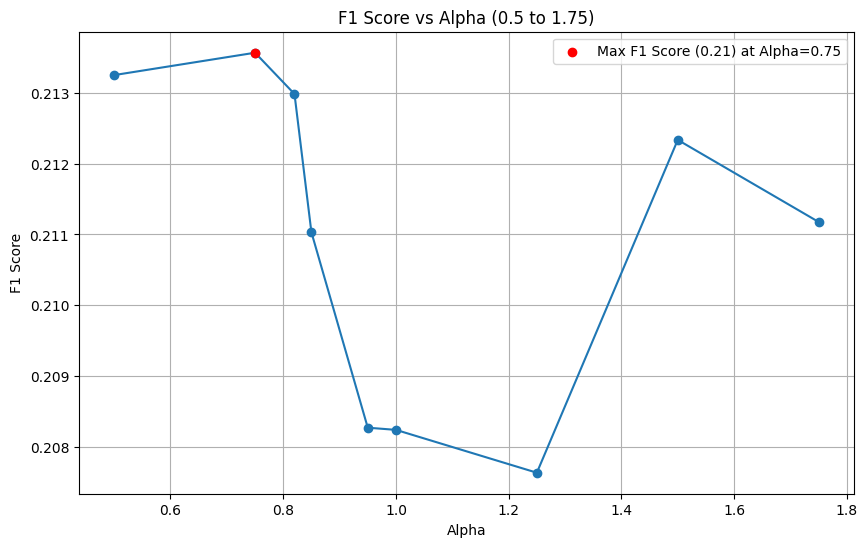

In [487]:
# Define the classifier
nb_clf = BernoulliNB()

# Define the parameter grid for hyperparameter tuning
hyperparam_grid = {
    'alpha': [0.5, 0.75, 0.82, 0.85, 0.95, 1.0, 1.25, 1.5, 1.75]
}

# Define F1 score as the evaluation metric
scorer = make_scorer(f1_score, average='weighted')

# Initialize GridSearchCV with F1 score as the evaluation metric
grid_search = GridSearchCV(nb_clf, hyperparam_grid, cv=5, scoring=scorer)

# Perform grid search on training data
grid_search.fit(train_1, train_2)

# Get the results
results = grid_search.cv_results_


print("lets get the model with the highest F1 score ")
print("")
# Extract alpha values and corresponding F1 scores
alphas = results['param_alpha'].data
f1_scores = results['mean_test_score']

# Filter alpha values and F1 scores for the desired range
filtered_alphas = []
filtered_f1_scores = []
for alpha, f1_score in zip(alphas, f1_scores):
    if 0.5 <= alpha <= 1.75:
        filtered_alphas.append(alpha)
        filtered_f1_scores.append(f1_score)

# Find the alpha value corresponding to the maximum F1 score
max_f1_score_index = filtered_f1_scores.index(max(filtered_f1_scores))
max_alpha = filtered_alphas[max_f1_score_index]
max_f1_score = filtered_f1_scores[max_f1_score_index]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_alphas, filtered_f1_scores, marker='o')
plt.scatter(max_alpha, max_f1_score, color='red', label=f'Max F1 Score ({max_f1_score:.2f}) at Alpha={max_alpha}', zorder=5)
plt.title('F1 Score vs Alpha (0.5 to 1.75)')
plt.xlabel('Alpha')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.show()



# Get the best model from grid search
best_nb_clf = grid_search.best_estimator_

print("")


In [488]:
# Make predictions on test data
test_predictions = best_nb_clf.predict(test_data)
# Convert predictions back to original labels
convert_predictions_tolabels = label_encoder.inverse_transform(test_predictions)

test_predictions_labels = convert_predictions_tolabels

# Prepare the dataframe for submission
submission_df = pd.DataFrame({'ID': test_data_whole['ID'], 'Education': test_predictions_labels})
submission_df.to_csv('predicted_education5.csv', index=False)
